In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

In [17]:
def synthetic_data(w, b, num_examples):   #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.1, y.shape)
    return X, y.reshape((-1, 1))

In [18]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [19]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([1.9862, 0.6462]) 
label: tensor([5.9509])


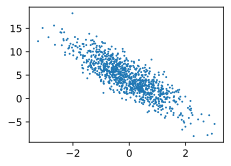

In [21]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:,1]), d2l.numpy(labels), 1);

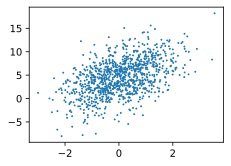

In [22]:
d2l.plt.scatter(d2l.numpy(features[:,0]), d2l.numpy(labels), 1);

In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [44]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9023,  0.0595],
        [-0.3497,  0.6831],
        [-1.0224, -0.8515],
        [ 0.4633, -0.4301],
        [-0.5225,  0.3173],
        [-1.6570, -0.1883],
        [ 1.8571, -0.9801],
        [ 0.0542, -0.8924],
        [-1.3940, -0.3470],
        [-0.5940, -1.4652]]) 
 tensor([[ 2.1328],
        [ 1.2037],
        [ 5.0562],
        [ 6.4969],
        [ 2.1055],
        [ 1.4389],
        [11.1659],
        [ 7.5128],
        [ 2.6641],
        [ 7.9592]])


In [83]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [84]:
def linreg(X, w, b):   #@save
    """The linear regression model"""
    return torch.matmul(X, w) + b

In [85]:
def squared_loss(y_hat, y):   #@save
    """Squared loss"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [86]:
def sgd(params, lr, batch_size):   #@save
    """Minibatch stochastic gradient descent"""
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [87]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.035392
epoch 2, loss 0.004814
epoch 3, loss 0.004769


In [63]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0026, 0.0043], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0088], grad_fn=<RsubBackward1>)


In [53]:
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[0.],
         [0.]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [54]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

epoch 1, loss 0.034616
epoch 2, loss 0.004824
epoch 3, loss 0.004772
error in estimating w: tensor([0.0027, 0.0010], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0050], grad_fn=<RsubBackward1>)
